# EDA

In [153]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

In [154]:
# Import data
df = pd.read_csv('../data-ignore/train.csv', dtype={'Upc': str})
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,60538815980,1,SHOES,8931.0
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504.0
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017.0


### Data fields

In [155]:
# TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
# VisitNumber - an id corresponding to a single trip by a single customer
# Weekday - the weekday of the trip
# Upc - the UPC number of the product purchased
# ScanCount - the number of the given item that was purchased. A negative value indicates a product return.
# DepartmentDescription - a high-level description of the item's department
# FinelineNumber - a more refined category for each of the products, created by Walmart

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TripType               647054 non-null  int64  
 1   VisitNumber            647054 non-null  int64  
 2   Weekday                647054 non-null  object 
 3   Upc                    642925 non-null  object 
 4   ScanCount              647054 non-null  int64  
 5   DepartmentDescription  645693 non-null  object 
 6   FinelineNumber         642925 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 34.6+ MB


### Check Nulls

In [205]:
# Check when is Upc null
null_upc = df[df['Upc'].isna()]
null_upc

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...
643137,41,190408,Sunday,NaN,1,NaN,NaN
643991,44,190651,Sunday,NaN,1,NaN,NaN
645990,44,191080,Sunday,NaN,-1,NaN,NaN
645991,44,191080,Sunday,NaN,1,NaN,NaN


<Axes: >

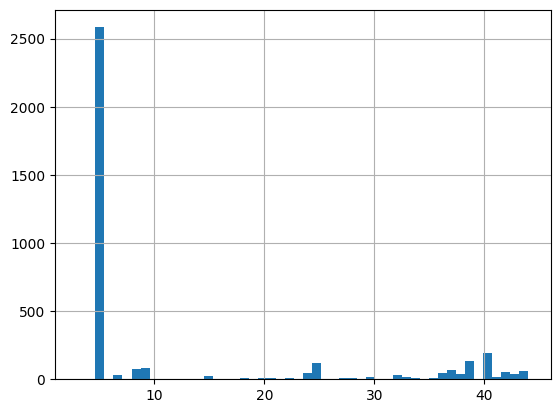

In [208]:
# Check the distribution when Upc is null
null_upc[null_upc['TripType'] < 50]['TripType'].hist(bins=50)

In [211]:
# Check the most frequent TripType when upc is null
null_upc_triptypes = pd.DataFrame(null_upc['TripType'].value_counts())
null_upc_triptypes

,count
TripType,
5,2583
999,352
40,193
39,135
25,116
9,82
8,78
37,68
44,63


In [214]:
# check if Upc and FinelineNumber are always null at the same time
null_upc['FinelineNumber'].isna().sum()

np.int64(4129)

### Check nulls in DepartmentDescription

In [217]:
null_department = df[df['DepartmentDescription'].isna()]
null_department

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
25,26,8,Friday,NaN,1,NaN,NaN
548,27,259,Friday,NaN,3,NaN,NaN
549,27,259,Friday,NaN,1,NaN,NaN
959,999,409,Friday,NaN,-1,NaN,NaN
1116,39,479,Friday,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...
643137,41,190408,Sunday,NaN,1,NaN,NaN
643991,44,190651,Sunday,NaN,1,NaN,NaN
645990,44,191080,Sunday,NaN,-1,NaN,NaN
645991,44,191080,Sunday,NaN,1,NaN,NaN


In [220]:
# Check when Upc is null but DepartmentDescription is not
null_upc_yes_dept = null_upc[null_upc['DepartmentDescription'].notna()]
null_upc_yes_dept

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
1155,44,496,Friday,NaN,1,PHARMACY RX,NaN
1216,5,521,Friday,NaN,1,PHARMACY RX,NaN
1373,5,585,Friday,NaN,1,PHARMACY RX,NaN
1455,5,619,Friday,NaN,1,PHARMACY RX,NaN
1456,5,619,Friday,NaN,1,PHARMACY RX,NaN
...,...,...,...,...,...,...,...
636715,5,188839,Sunday,NaN,1,PHARMACY RX,NaN
636716,5,188839,Sunday,NaN,1,PHARMACY RX,NaN
636717,5,188839,Sunday,NaN,1,PHARMACY RX,NaN
636847,5,188896,Sunday,NaN,1,PHARMACY RX,NaN


In [225]:
# Check the ScanCount distribution
null_upc_yes_dept['ScanCount'].value_counts()

ScanCount
 1    2697
-1      67
 2       4
Name: count, dtype: int64

In [222]:
# Check how many departments are in this subset
null_upc_yes_dept['DepartmentDescription'].value_counts()

DepartmentDescription
PHARMACY RX    2768
Name: count, dtype: int64

- All null upc but have a dept is Pharmacy transaction

In [224]:
# Check the TripTypes in this subset
null_upc_yes_dept['TripType'].value_counts()

TripType
5      2570
999     105
36       22
43       18
39       13
8        10
25        6
4         4
38        3
44        3
9         3
34        2
40        2
7         2
27        1
28        1
20        1
41        1
42        1
Name: count, dtype: int64

- Most are TripType 5
- Seems like the TripType is 5 unless the trip also included other items. 

In [232]:
# Get all Pharmacy transactions
transactions_pharmacy = df[df['DepartmentDescription'] == 'PHARMACY RX']
transactions_pharmacy

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
1155,44,496,Friday,NaN,1,PHARMACY RX,NaN
1216,5,521,Friday,NaN,1,PHARMACY RX,NaN
1373,5,585,Friday,NaN,1,PHARMACY RX,NaN
1455,5,619,Friday,NaN,1,PHARMACY RX,NaN
1456,5,619,Friday,NaN,1,PHARMACY RX,NaN
...,...,...,...,...,...,...,...
636715,5,188839,Sunday,NaN,1,PHARMACY RX,NaN
636716,5,188839,Sunday,NaN,1,PHARMACY RX,NaN
636717,5,188839,Sunday,NaN,1,PHARMACY RX,NaN
636847,5,188896,Sunday,NaN,1,PHARMACY RX,NaN


In [238]:
# Group by the Pharmacy transactions by VisitNumber
visits_pharmacy = transactions_pharmacy.groupby('VisitNumber').agg(
  triptype=('TripType','first'), 
  weekday=('Weekday','first'), 
  total_scancount=('ScanCount','sum'))
visits_pharmacy.reset_index(inplace=True)
visits_pharmacy

,VisitNumber,triptype,weekday,total_scancount
0,496,44,Friday,1
1,521,5,Friday,1
2,585,5,Friday,1
3,619,5,Friday,3
4,683,5,Friday,2
...,...,...,...,...
1676,188502,5,Sunday,2
1677,188661,5,Sunday,2
1678,188839,5,Sunday,3
1679,188896,5,Sunday,1


<Axes: >

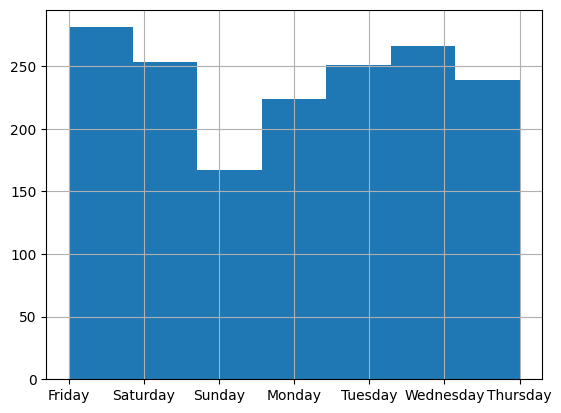

In [240]:
visits_pharmacy['weekday'].hist(bins=7)

- Compared to the distribution for all transactions, there are a lot more on Mon-Fri
- Sunday has notably fewer visits, likely because the pharmacy may have limited hours or closed on Sunday

### EDA: TripType

In [156]:
# Check number of unique
df['TripType'].nunique()

38

In [157]:
# Check value counts
value_counts_df = pd.DataFrame(df['TripType'].value_counts())
value_counts_df.reset_index(inplace=True)
value_counts_df.sort_values(by='TripType')

,TripType,count
18,3,6827
35,4,901
14,5,13836
26,6,3405
5,7,23199
6,8,22844
12,9,16820
31,12,2108
37,14,35
17,15,7147


### EDA: VisitNumber

In [158]:
# Check number of unique visit number
df['VisitNumber'].nunique()

95674

In [159]:
# Group by visit number, get the average trip type(should be the same for all instances of that visit)
grouped_visit = df.groupby('VisitNumber')[['TripType']].mean()
grouped_visit.reset_index(inplace=True)
grouped_visit

,VisitNumber,TripType
0,5,999.0
1,7,30.0
2,8,26.0
3,9,8.0
4,10,8.0
...,...,...
95669,191343,25.0
95670,191344,22.0
95671,191345,39.0
95672,191346,39.0


In [160]:
# Verfiy that the number of unique visits is the same
grouped_visit['VisitNumber'].nunique()

95674

In [161]:
# Change TripType 999 to 50 for easier visualization
grouped_visit['TripType'] = grouped_visit['TripType'].apply(lambda x: 50 if x==999.0 else x)

In [162]:
# Check each TripType has how many unique visits
visits_per_triptype = pd.DataFrame(grouped_visit['TripType'].value_counts())
visits_per_triptype.reset_index(inplace=True)
visits_per_triptype.sort_values(by='TripType')

,TripType,count
8,3.0,3643
34,4.0,346
6,5.0,4593
17,6.0,1277
5,7.0,5752
0,8.0,12161
2,9.0,9464
35,12.0,269
37,14.0,4
20,15.0,978


<Axes: >

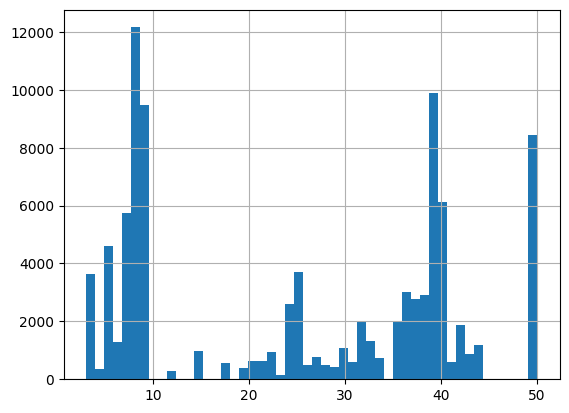

In [163]:
# Check the distribution
grouped_visit['TripType'].hist(bins=50)

In [164]:
# Get the number of items purchased per trip
num_unique_items = df.groupby('VisitNumber')[['Upc']].count()
num_unique_items.reset_index(inplace=True)
num_unique_items

,VisitNumber,Upc
0,5,1
1,7,2
2,8,22
3,9,3
4,10,3
...,...,...
95669,191343,7
95670,191344,5
95671,191345,13
95672,191346,17


<Axes: >

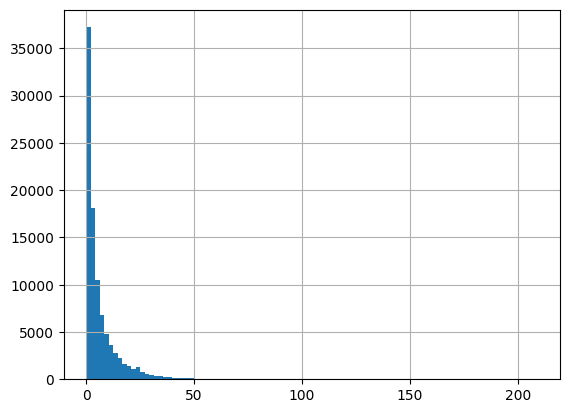

In [165]:
# Plot the distribution
num_unique_items['Upc'].hist(bins=100)

In [166]:
num_unique_items['Upc'].describe()

count    95674.000000
mean         6.719955
std          8.537999
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        209.000000
Name: Upc, dtype: float64

<Axes: >

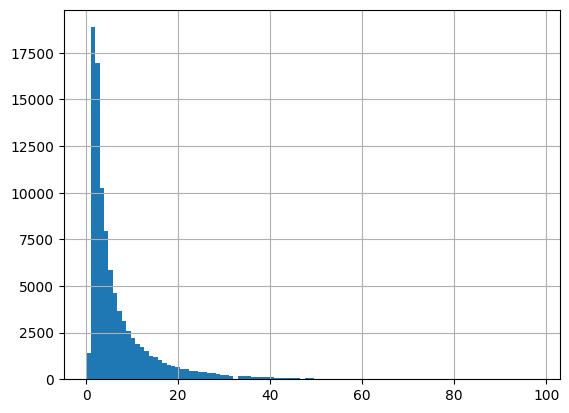

In [167]:
# Plot the distribution of number of unique items per trip (under 75 items due to outliers)
num_unique_items[num_unique_items['Upc'] < 100]['Upc'].hist(bins=101)

In [168]:
# Check the extreme values
num_unique_items[num_unique_items['Upc'] >= 100]

,VisitNumber,Upc
4662,9181,113
30523,60971,112
32914,65792,109
36262,72439,209
40156,80318,104
43970,88011,151


In [169]:
# Get the total number of scans per visit
total_scan_count = df.groupby('VisitNumber')[['ScanCount']].sum()
total_scan_count.reset_index(inplace=True)
total_scan_count

,VisitNumber,ScanCount
0,5,-1
1,7,2
2,8,28
3,9,3
4,10,3
...,...,...
95669,191343,9
95670,191344,5
95671,191345,17
95672,191346,17


<Axes: >

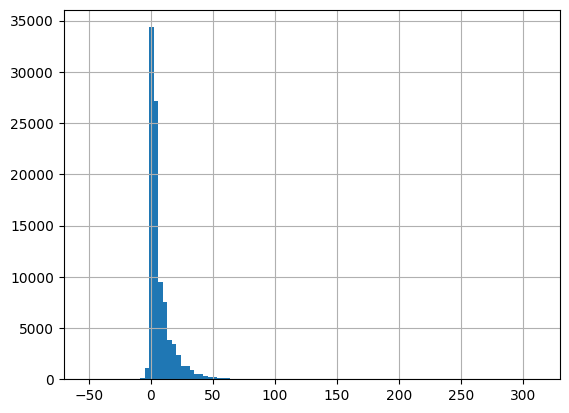

In [170]:
# Plot the distribution of total number of scans per visit
total_scan_count['ScanCount'].hist(bins=100)

<Axes: >

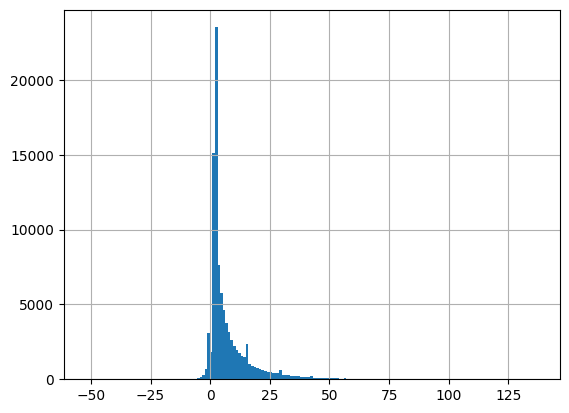

In [171]:
# Plot the distribution of total number of scans per visit (under 100)
total_scan_count[total_scan_count['ScanCount']<150]['ScanCount'].hist(bins=175)

In [172]:
# Check the extreme values (>= 150)
total_scan_count[total_scan_count['ScanCount']>=150]

,VisitNumber,ScanCount
36262,72439,311
43970,88011,183


In [173]:
# Check the extreme values (<= -15)
total_scan_count[total_scan_count['ScanCount']<-15]

,VisitNumber,ScanCount
7781,15380,-17
13789,27471,-52
25302,50671,-26
30563,61053,-26
41507,83064,-18
65589,131193,-37
66562,133103,-23
67780,135558,-21
92614,185196,-16


In [174]:
# Get the avg number of scans per visit
avg_scan_count = df.groupby('VisitNumber')[['ScanCount']].mean()
avg_scan_count.reset_index(inplace=True)
avg_scan_count

,VisitNumber,ScanCount
0,5,-1.000000
1,7,1.000000
2,8,1.217391
3,9,1.000000
4,10,1.000000
...,...,...
95669,191343,1.285714
95670,191344,1.000000
95671,191345,1.307692
95672,191346,1.000000


<Axes: >

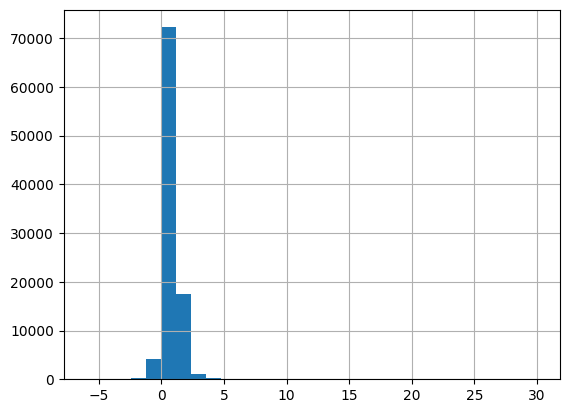

In [175]:
# Plot the distribution of avg number of scans per item per visit
avg_scan_count['ScanCount'].hist(bins=30)

<Axes: >

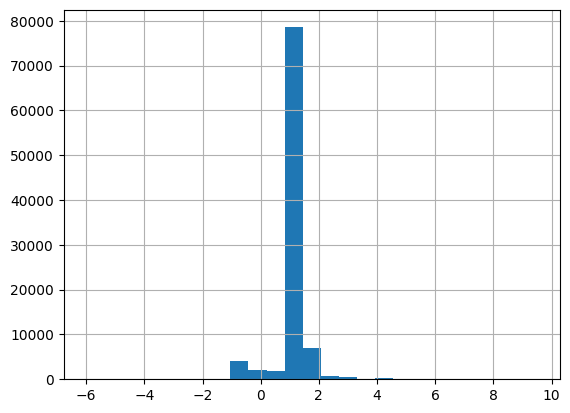

In [176]:
# Plot the distribution of avg number of scans per item per visit (without outliers)
avg_scan_count[avg_scan_count['ScanCount'] < 10]['ScanCount'].hist(bins=25)

In [177]:
# Check the extreme values
avg_scan_count[avg_scan_count['ScanCount'] > 10]

,VisitNumber,ScanCount
3744,7379,30.0
22776,45738,11.2
26192,52371,11.5
27142,54281,14.0
29781,59515,12.0
44295,88676,11.0
47074,94195,12.0
47821,95785,12.0
53551,107346,17.0
55458,111082,18.0


In [178]:
df[df['VisitNumber'] == 72439]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
244440,24,72439,Tuesday,88616687879,1,BOYS WEAR,1025.0
244441,24,72439,Tuesday,7602630673,2,COOK AND DINE,2067.0
244442,24,72439,Tuesday,7214063386,1,PERSONAL CARE,3090.0
244443,24,72439,Tuesday,4393558928,2,MENS WEAR,5542.0
244444,24,72439,Tuesday,4747558605,1,CELEBRATION,5507.0
...,...,...,...,...,...,...,...
244644,24,72439,Tuesday,84943400190,1,COOK AND DINE,2074.0
244645,24,72439,Tuesday,84943400190,2,COOK AND DINE,2074.0
244646,24,72439,Tuesday,84943400190,1,COOK AND DINE,2074.0
244647,24,72439,Tuesday,7153414025,1,INFANT APPAREL,1602.0


In [179]:
# Get the total scancount for each Upc per trip
grouped_upc = df.groupby(['VisitNumber','Upc'])[['ScanCount']].sum()
grouped_upc 

ScanCount
VisitNumber Upc                   
5           68113152929         -1
7           60538815980          1
            7410811099           1
8           2006613743           1
            2006613744           2
...                            ...
191346      7874203977           1
            7874205336           1
            7874222953           1
191347      3800059655           1
            4190007664           1

[628483 rows x 1 columns]

In [180]:
# Reset index in order to apply additional groupbys
grouped_upc.reset_index(inplace=True)
grouped_upc

,VisitNumber,Upc,ScanCount
0,5,68113152929,-1
1,7,60538815980,1
2,7,7410811099,1
3,8,2006613743,1
4,8,2006613744,2
...,...,...,...
628478,191346,7874203977,1
628479,191346,7874205336,1
628480,191346,7874222953,1
628481,191347,3800059655,1


In [181]:
# Calculate the number of unique Upc per visit, and the avg # scancount per item
num_upc_avg_scancount = grouped_upc.groupby('VisitNumber').agg({'Upc':'count','ScanCount':'mean'})
num_upc_avg_scancount.reset_index(inplace=True)
num_upc_avg_scancount

,VisitNumber,Upc,ScanCount
0,5,1,-1.000000
1,7,2,1.000000
2,8,20,1.350000
3,9,3,1.000000
4,10,3,1.000000
...,...,...,...
94242,191343,7,1.285714
94243,191344,5,1.000000
94244,191345,13,1.307692
94245,191346,17,1.000000


### Weekday

<Axes: >

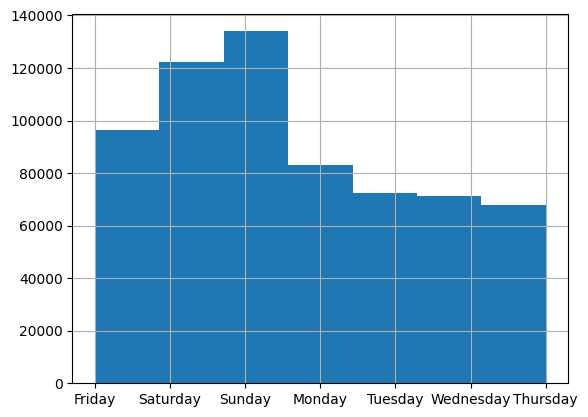

In [184]:
# Check the distribution of items (not groupby tripnumber) over the days of the week
df['Weekday'].hist(bins=7)

In [189]:
# Group by VisitNumber, taking the first Weekday (should be the same for all transaction in the same trip)
grouped_weekday = df.groupby('VisitNumber')[['Weekday']].first()
grouped_weekday.reset_index(inplace=True)
grouped_weekday

,VisitNumber,Weekday
0,5,Friday
1,7,Friday
2,8,Friday
3,9,Friday
4,10,Friday
...,...,...
95669,191343,Sunday
95670,191344,Sunday
95671,191345,Sunday
95672,191346,Sunday


<Axes: >

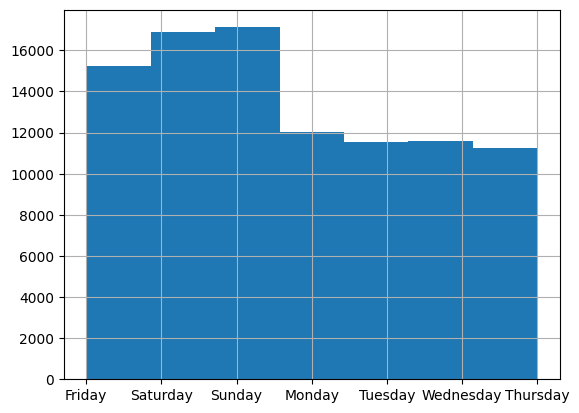

In [192]:
# Plot the distribution of the weekdays by tripnumber
grouped_weekday['Weekday'].hist(bins=7)

- There seems to be a difference between the distributions of the Number of items sold and the Number of trips between the days of the week. There is a bigger difference between the weekend and the weekdays when it comes to the number of items sold, meaning that baskets are bigger on the weekends. The is smaller difference between the weekend and the weekdays when it comes to number of trips. This probably means that the average basket size is smaller on the weekdays.

### FinelineNumber

In [198]:
df['FinelineNumber'].describe()

count    642925.000000
mean       3726.884567
std        2780.966158
min           0.000000
25%        1404.000000
50%        3352.000000
75%        5501.000000
max        9998.000000
Name: FinelineNumber, dtype: float64

### Weekday vs Weekend

In [193]:
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,60538815980,1,SHOES,8931.0
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504.0
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017.0


In [ ]:
df.groupby(['VisitNumber','FinelineNumber'])

In [ ]:
df.groupby(['VisitNumber','DepartmentDescription'])

In [ ]:
df.groupby(['VisitNumber','Upc']).agg

In [241]:
df.groupby('VisitNumber').agg(triptype=('TripType','first'),
                              weekday=('Weekday','first'),
                              num_unique_upc=('Upc','nunique'),
                              avg_scancount=('ScanCount','mean'),
                              total_scancount=('ScanCount','sum'),
                              num_unique_dept=('DepartmentDescription','nunique'),
                              num_unique_fileline=('FinelineNumber','nunique')
                              )

,triptype,weekday,num_unique_upc,avg_scancount,total_scancount,num_unique_dept,num_unique_fileline
VisitNumber,,,,,,,
5,999,Friday,1,-1.000000,-1,1,1
7,30,Friday,2,1.000000,2,2,2
8,26,Friday,20,1.217391,28,6,16
9,8,Friday,3,1.000000,3,2,3
10,8,Friday,3,1.000000,3,2,3
...,...,...,...,...,...,...,...
191343,25,Sunday,7,1.285714,9,3,5
191344,22,Sunday,5,1.000000,5,2,3
191345,39,Sunday,13,1.307692,17,8,12
